### check and preview data once again to think about ideas for analysis questions


In [1]:
import duckdb 
import pandas as pd
duckdb.sql(""" describe structured_jobs.parquet""")

┌──────────────────────┬──────────────────────────┬─────────┬─────────┬─────────┬─────────┐
│     column_name      │       column_type        │  null   │   key   │ default │  extra  │
│       varchar        │         varchar          │ varchar │ varchar │ varchar │ varchar │
├──────────────────────┼──────────────────────────┼─────────┼─────────┼─────────┼─────────┤
│ id                   │ BIGINT                   │ YES     │ NULL    │ NULL    │ NULL    │
│ file                 │ VARCHAR                  │ YES     │ NULL    │ NULL    │ NULL    │
│ title                │ VARCHAR                  │ YES     │ NULL    │ NULL    │ NULL    │
│ description          │ VARCHAR                  │ YES     │ NULL    │ NULL    │ NULL    │
│ datePosted           │ TIMESTAMP WITH TIME ZONE │ YES     │ NULL    │ NULL    │ NULL    │
│ companyName          │ VARCHAR                  │ YES     │ NULL    │ NULL    │ NULL    │
│ companyLink          │ VARCHAR                  │ YES     │ NULL    │ NULL    

In [2]:
duckdb.sql("""select * from structured_jobs.parquet USING SAMPLE 20 ROWS;""").show()

┌───────┬────────────────────────────────┬────────────────────────────────────────────────────────────┬─────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────

# Defining analysis Questions and their respective algorithm (analysis method)

<table>
  <thead>
    <tr>
      <th>Question</th>
      <th>Main Question</th>
      <th>Analysis Method</th>
      <th>Visualization</th>
      <th>Why this is interesting</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td><b>Question 1</b></td>
      <td>
        What are the top 15 most common job occupational categories of the underlying data (more standardized than JOB Titles and therefore easier to measure)
      </td>
      <td>
        use SQL count(*) aggregation combined with group by
      </td>
      <td>
        matplotlib bar chart
      </td>
      <td>
        shows us what jobs of our underlying data are in highest demand
      </td>
    </tr>
    <tr>
      <td><b>Question 2</b></td>
      <td>
        How old is the median job posting for each of the 15 most common occupational categories of the underlying data 
        (I will measure this using the date when I scraped the website)
      </td>
      <td>
        use the median function that is supported in DuckDB
      </td>
      <td>
        matplotlib box plots for each occupationalCategory
      </td>
      <td>
        gives us a glimpse into how long jobs are available for each category (older postings → maybe hard to fill role)
      </td>
    </tr>
    <tr>
      <td><b>Question 3</b></td>
      <td>
        In how many job postings is each of the defined terms mentioned of the underlying data<br><br>
        <i>terms = [
    "Bash",
    "Powershell",
    "Java ",
    "Kotlin",
    "JavaScript",
    "PHP",
    "Python",
    "SQL",
    "TypeScript",
    "Angular",
    "CSS",
    "JavaFX",
    "React",
    "React Native",
    "Next.js",
    "Flutter",
    "Tailwind",
    "Vue.js",
    ".NET",
    "Express.js",
    "FastAPI",
    "Flask",
    "Django",
    "Node.js",
    "Spring",
    "MongoDB",
    "MySQL",
    "PostgreSQL",
    "Redis",
    "Airflow",
    "Camel",
    "dbt",
    "Hadoop",
    "Kafka",
    "Spark",
    "Influxdb",
    "Cassandra",
    "Prometheus"
    "pandas",
    "PyTorch",
    "scikit-learn",
    "TensorFlow",
    "Docker",
    "Git ",
    "Github",
    "Gitlab",
    "Jenkins",
    "Kubernetes",
    "Terraform",
    "Cypress",
    "Jest",
    "PyTest",
    "Postman",
    "VS Code",
    "IntelliJ",
    "Excel",
    "SAP",
    "Power BI",
    "Tableau",
    "Gradio",
    "Streamlit",
    "AWS",
    "S3",
    "Azure",
    "Firebase"
]
]</i>
      </td>
      <td>
        filtering and text-search
      </td>
      <td>
        bar chart
      </td>
      <td>
        This is a good use-case for valuable text-analysis! If I'm looking for a job in Software Engineering or Data Engineering 
        I might be interested in what tools & technologies are in demand by employers. 
        This result might also be interesting for the BFH or other educational institutions 
        to validate if they teach things that are in demand 😉
      </td>
    </tr>
    <tr>
      <td><b>Question 4 (Bonus)</b></td>
      <td>
        How are the jobs distributed across Switzerland (Job Location) of the underlying data (top 50 most mentioned Job Locations)
      </td>
      <td>
        use SQL count(*) aggregation combined with group by
      </td>
      <td>
        sShow a barchart
      </td>
      <td>
        It is valuable to know in what regions have high demand for jobs.
      </td>
    </tr>
  </tbody>
</table>


# Implementation Q1

In [3]:
import matplotlib.pyplot as plt
count_top_15_categories_df = duckdb.sql("""
                            Select COUNT(*) as count,  occupationalCategory  as 'Ocupational Category' 
                            FROM structured_jobs.parquet 
                            GROUP BY occupationalCategory
                            ORDER BY count DESC
                            LIMIT 15;""").to_df()
count_top_15_categories_df = duckdb.sql(""" SELECT * FROM count_top_15_categories_df ORDER BY count ASC; """).to_df()
count_top_15_categories_df

,count,Ocupational Category
0,21,Web Publishing / Design
1,24,Web Programmierung / Mobile
2,29,Immobilien Handel/Bewirtschaftung
3,39,Buchhaltung
4,81,Datenbank Spezialisten / Entwicklung
5,99,Netzwerk Spezialisten / Engineers
6,114,System Administration
7,120,ERP / SAP / CRM
8,120,Testing / Audit / Security
9,125,Projekt Management / Analyse


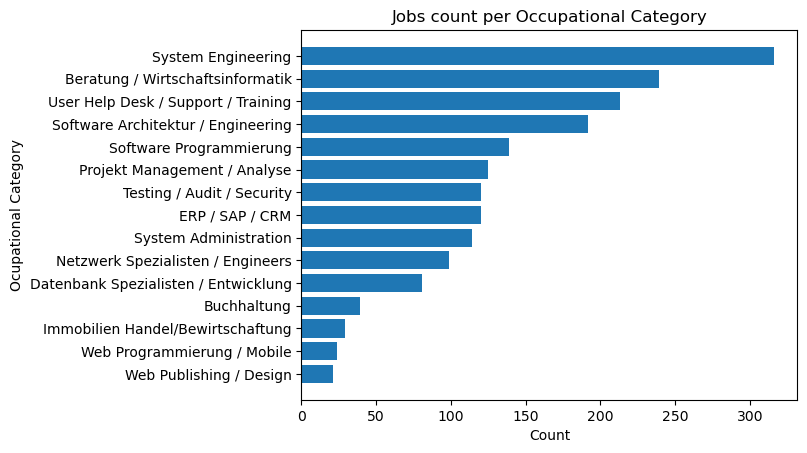

In [4]:
plt.barh(count_top_15_categories_df["Ocupational Category"], count_top_15_categories_df["count"])
plt.xlabel("Count")
plt.ylabel("Ocupational Category")
plt.title("Jobs count per Occupational Category")
plt.show()


# Implementation Q2

<Figure size 1000x600 with 0 Axes>

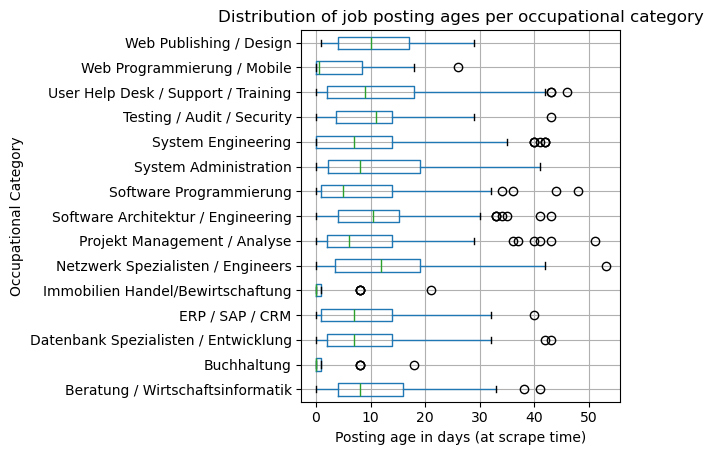

In [5]:

top_15_categories_df = duckdb.sql(
"""SELECT * FROM structured_jobs.parquet WHERE occupationalCategory IN (
'Web Publishing / Design', 
'Web Programmierung / Mobile', 
'Immobilien Handel/Bewirtschaftung', 
'Buchhaltung', 
'Datenbank Spezialisten / Entwicklung', 
'Netzwerk Spezialisten / Engineers', 
'System Administration', 
'ERP / SAP / CRM', 
'Testing / Audit / Security', 
'Projekt Management / Analyse', 
'Software Programmierung', 
'Software Architektur / Engineering', 
'User Help Desk / Support / Training', 
'Beratung / Wirtschaftsinformatik', 
'System Engineering'
); """).to_df()



# make scrape timestamp which must be time-zone aware
scrape_timestamp = pd.to_datetime("2025-10-15 07:46:29").tz_localize("Europe/Zurich")


# compute age column (age in days)
top_15_categories_df["age_days"] = (scrape_timestamp - top_15_categories_df["datePosted"]).dt.days
#top_15_categories_df.info()

plt.figure(figsize=(10, 6))

top_15_categories_df.boxplot( 
    # uing Pandas' built–in plotting wrapper which: 
    # Automatically creates the subplots internally, Groups the data by the by= column, Draws one boxplot per group
    column="age_days",
    by="occupationalCategory",
    vert=False   # horizontal boxplots (easier to read)
)

plt.xlabel("Posting age in days (at scrape time)") 
plt.ylabel("Occupational Category")
plt.title("Distribution of job posting ages per occupational category")
plt.suptitle("")  # removes Pandas default ugly title
plt.tight_layout()
plt.show()




# Implementation Question 3

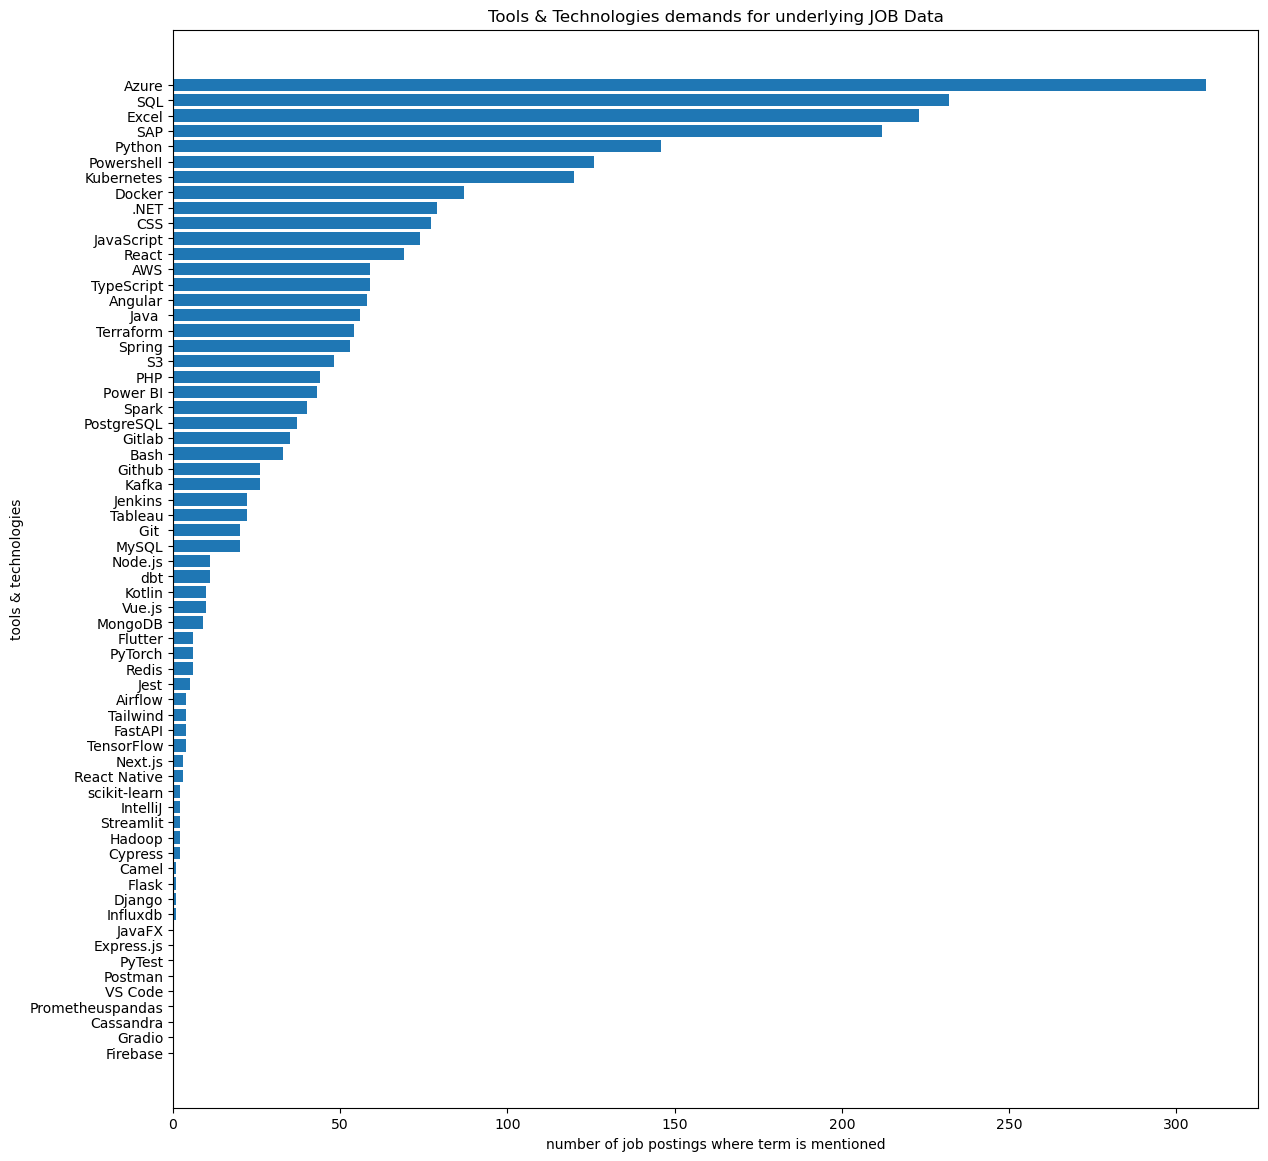

In [6]:
terms = [
    "Bash",
    "Powershell",
    "Java ",
    "Kotlin",
    "JavaScript",
    "PHP",
    "Python",
    "SQL",
    "TypeScript",
    "Angular",
    "CSS",
    "JavaFX",
    "React",
    "React Native",
    "Next.js",
    "Flutter",
    "Tailwind",
    "Vue.js",
    ".NET",
    "Express.js",
    "FastAPI",
    "Flask",
    "Django",
    "Node.js",
    "Spring",
    "MongoDB",
    "MySQL",
    "PostgreSQL",
    "Redis",
    "Airflow",
    "Camel",
    "dbt",
    "Hadoop",
    "Kafka",
    "Spark",
    "Influxdb",
    "Cassandra",
    "Prometheus"
    "pandas",
    "PyTorch",
    "scikit-learn",
    "TensorFlow",
    "Docker",
    "Git ",
    "Github",
    "Gitlab",
    "Jenkins",
    "Kubernetes",
    "Terraform",
    "Cypress",
    "Jest",
    "PyTest",
    "Postman",
    "VS Code",
    "IntelliJ",
    "Excel",
    "SAP",
    "Power BI",
    "Tableau",
    "Gradio",
    "Streamlit",
    "AWS",
    "S3",
    "Azure",
    "Firebase"
]

#.fetchone()[0] turns each query into an int, not a relation.
terms_counts_array = [duckdb.sql(f"""
                                SELECT COUNT(*) 
                                FROM structured_jobs.parquet 
                                WHERE LOWER(description) LIKE '%{term.lower()}%'; """).fetchone()[0] for term in terms]


sorted_series = pd.Series(terms_counts_array, index=terms).sort_values()

plt.figure(figsize=(14, 14))
plt.barh(sorted_series.index, sorted_series.values)

plt.title("Tools & Technologies demands for underlying JOB Data")
plt.xlabel("number of job postings where term is mentioned")
plt.ylabel("tools & technologies")
plt.show()







# Implementation Qquestion 4 (Bonus)

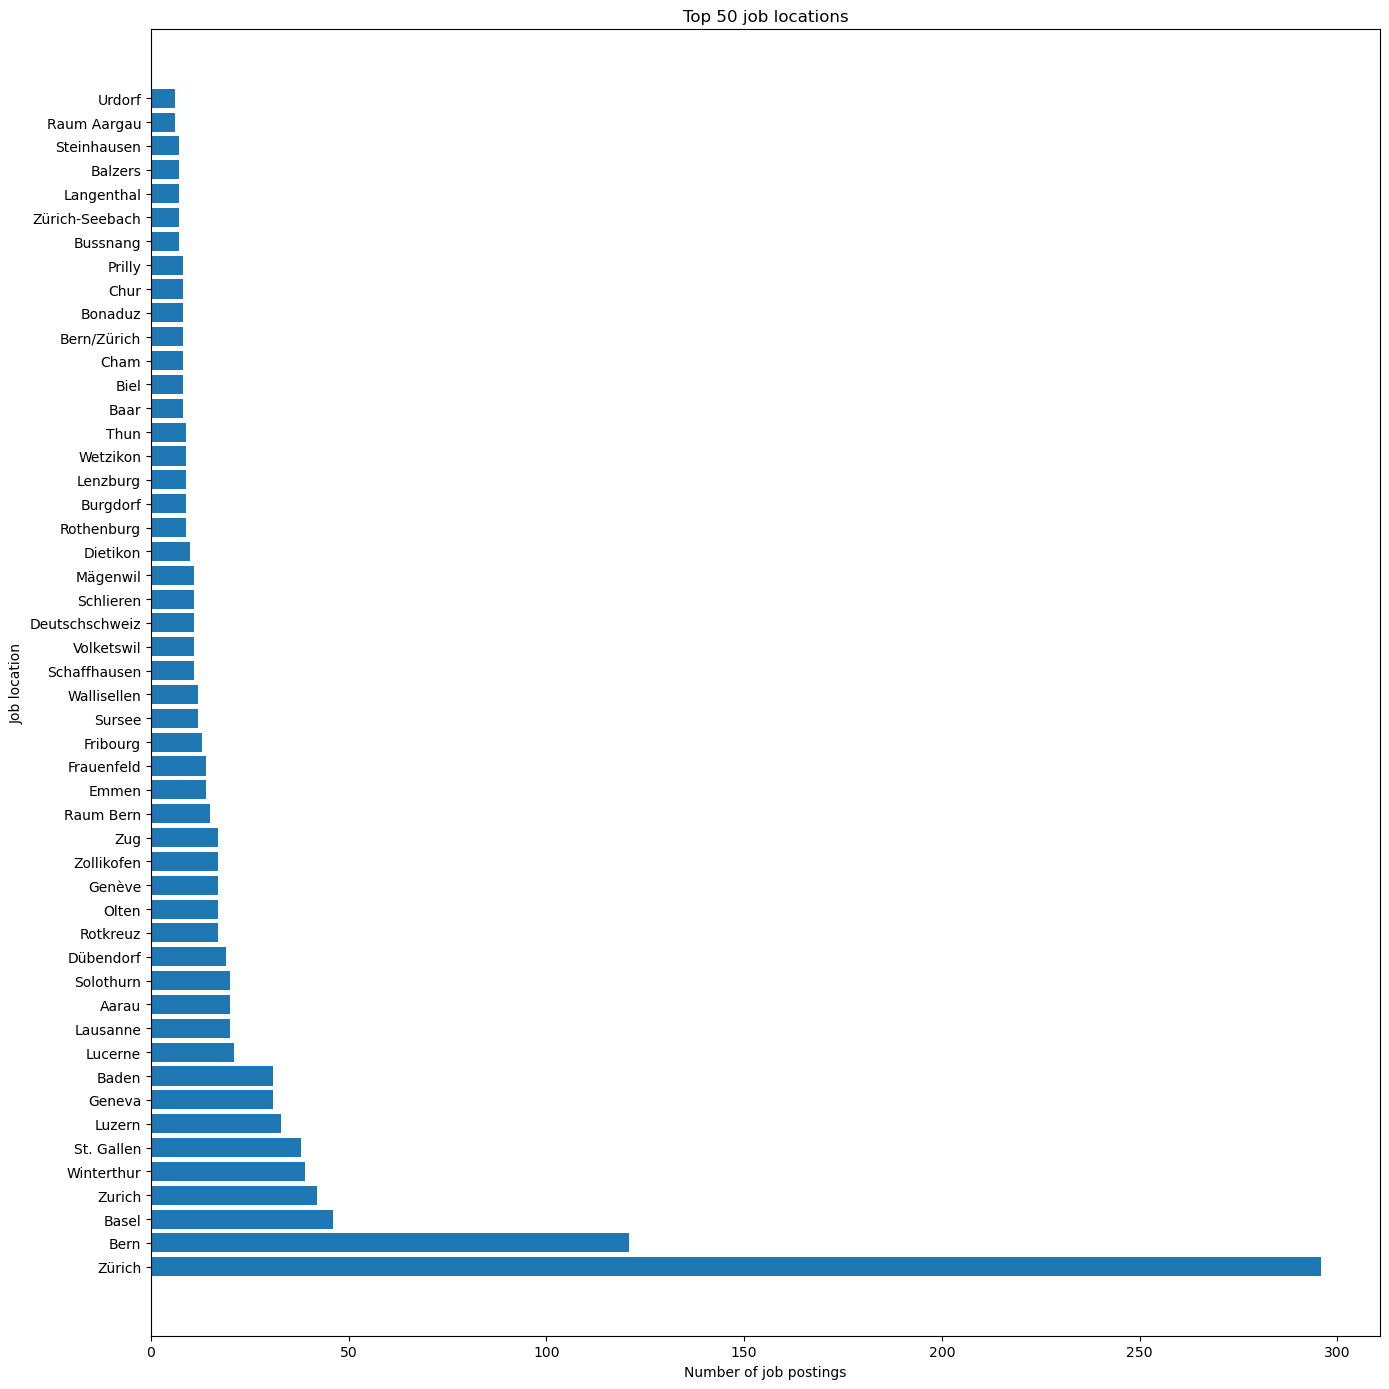

In [7]:
region_count_df = duckdb.sql("""SELECT COUNT(*) as count, jobLocation
                             FROM structured_jobs.parquet
                             GROUP BY jobLocation 
                             ORDER BY count DESC;""").to_df()
top_50_locations_df = region_count_df.head(50)



plt.figure(figsize=(14,14))
plt.barh(top_50_locations_df["jobLocation"], top_50_locations_df["count"] )
plt.xlabel("Number of job postings")
plt.ylabel("Job location")
plt.title("Top 50 job locations")
plt.tight_layout()
plt.show()

# Findings and Validity


## General thoughts about validity

In this task we wanted to analyze our structured data. An important question to consider is: **What are we analyzing and measuring?**

* For each question I wrote "What/How is xyz **of the underlying data**?" This is crucial!
* As described in a previous notebook, I mainly scraped jobs from the "Berufsgruppe" *Informatik / Telekommunikation* and also some of the "Berufsgruppe" *Finanzen / Treuhand / Immobilien*.
* I just scraped them from jobs.ch, and I only scraped them once (15.10.2025 in the morning).
* So the underlying data is just from one website at a certain point in time.
* Therefore the data might not represent the job market of Switzerland in an accurate way.
* For a better representation we would have to scrape different websites (e.g. also indeed.ch) and then scrape many times over a defined time interval (e.g. 3 months).
* So as a summary: from the results of our analysis we can only draw pretty certain conclusions about the underlying data, not about the general job market situation in Switzerland! However, these conclusions and findings are still interesting and might give us a rough idea about the Swiss job market (IT field).

---

## Question 1

**Question:** What are the top 15 most common job occupational categories of the underlying data?

**Findings:**

![Screenshot of Finding 1](./finding1.png)

**Validity:**
Since we only consider the underlying data, the validity is quite high, since the occupational categories field uses standardized values (jobTitle does not).
We can easily count those categories using `COUNT` and `GROUP BY` in SQL.

---

## Question 2

**Question:** How old is the median job posting for each of the 15 most common occupational categories of the underlying data?

**Findings:**

![Screenshot of Finding 2](./finding2.png)

**Validity:**
Here we want to look at things like: how easy is it to fill this role or how popular is this role.
We must take into account that maybe companies delete old job postings and then repost them again when they did not find somebody.
Or maybe a company does not delete the job posting even though the position is now occupied.
I used the median instead of the mean to mitigate these effects.

---

## Question 3

**Question:** In how many job postings is each of the defined terms mentioned in the underlying data?

**Findings:**

![Screenshot of Finding 3](./finding3.png)

**Validity:**
Here the validity is moderately high since we just try counting mentions of terms in the job posting descriptions.
We would only not count them if they are not written correctly (which is very unlikely), or maybe we would count “Java” too often because it appears also in “JavaScript” (for this reason I included a whitespace in the "Java" term and also in the "Git" term).
Even if not 100% accurate, this gives us a good idea of how demanded certain technologies & tools are, at least in the underlying data.

---

## Question 4 (Bonus)

**Question:** How are the jobs distributed across Switzerland (Job Location) in the underlying data?

**Findings:**

![Screenshot of Finding 3](./finding4.png)

**Validity:**
In this example the validity is more difficult because the `jobLocation` attribute is not standardized.
A job posting can have just one location or also many locations (you can choose where you want to work).
However, most job postings still only indicate 1 jobLocation.
We can easily count those location values using `COUNT` and `GROUP BY` in SQL.
